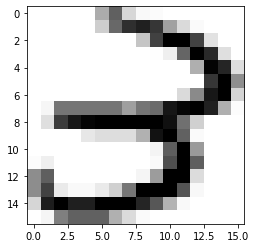

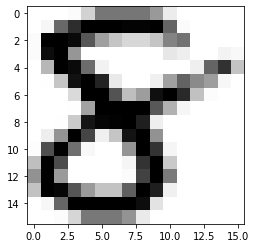

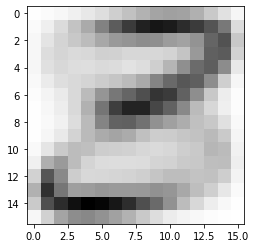

[[  59.16729323  142.14943609   28.68201754   -7.17857143  -14.3358396 ]
 [ 142.14943609  878.93879073  374.13731203   24.12778195  -87.12781955]
 [  28.68201754  374.13731203 1082.9058584   555.2268797    33.72431078]
 [  -7.17857143   24.12778195  555.2268797  1181.24408521  777.77192982]
 [ -14.3358396   -87.12781955   33.72431078  777.77192982 1429.95989975]]
Lambda 1: 237155.2462904853
Lambda 2: 145188.3526868256


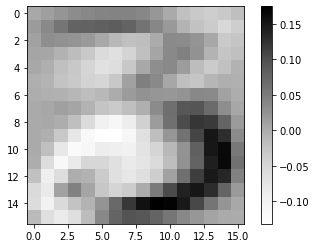

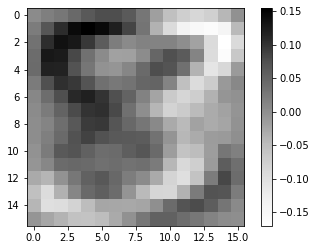

(200, 256)
(256, 2)
[ 240.89894248 -297.4864024 ]
[-207.99681327  594.71553874]


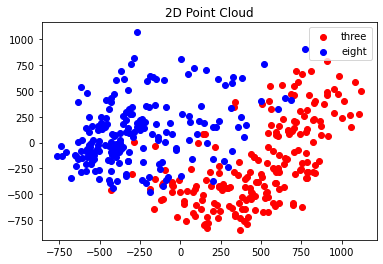

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df3 = pd.read_csv("three.txt", sep=" ", header=None)
df3.drop(df3.columns[[256]], axis=1, inplace=True)
arr3 = df3.to_numpy()
img31=np.reshape(arr3[0],(16,16)).T
plt.imshow(img31, cmap='Greys')
plt.show()

df8 = pd.read_csv("eight.txt", sep=" ", header=None)
df8.drop(df8.columns[[256]], axis=1, inplace=True)
arr8 = df8.to_numpy()
img81=np.reshape(arr8[0],(16,16)).T
plt.imshow(img81, cmap='Greys')
plt.show()

arr=np.append(arr3,arr8,axis=0)
#np.random.shuffle(arr)
y = np.mean(arr,axis=0)

imgy=np.reshape(y,(16,16)).T
plt.imshow(imgy,cmap='Greys')
plt.show()

y=np.tile(y,(arr.shape[0],1))
y=np.reshape(y,(arr.shape[0],arr.shape[1]))
arr=np.subtract(arr,y)
s=arr.T@arr
s=s/(arr.shape[0]-1)
print(s[0:5,0:5])

w,v=np.linalg.eig(s)
#print(w)
#print(np.argmax(w))
idx = np.argsort(w)[::-1][:2]
#print(idx)
print("Lambda 1:",w[idx[0]])
print("Lambda 2:",w[idx[1]])
v1=v[:,idx[0]]
v1=np.reshape(v1,(16,16))
v2=v[:,idx[1]]
v2=np.reshape(v2,(16,16))
v=np.vstack([v[:,idx[0]],v[:,idx[1]]]).T

v1_scaled = ((v1 - v.min()) * (1.0/(v.max() - v.min()) * 255.0)).astype('uint8')
#print(v1_scaled)
v2_scaled = ((v2 - v.min()) * (1.0/(v.max() - v.min()) * 255.0)).astype('uint8')
#print(v2_scaled)

imgv1= np.reshape(v1,(16,16)).T
#imgv1_scaled= np.reshape(v1_scaled,(16,16)).T
plt.imshow(imgv1,cmap='Greys')
plt.colorbar()
plt.show()

imgv2= np.reshape(v2,(16,16)).T
#imgv2_scaled= np.reshape(v2_scaled,(16,16)).T
plt.imshow(imgv2,cmap='Greys')
plt.colorbar()
plt.show()

print(arr3.shape)
print(v.shape)
print((arr3@v)[0,:])
print((arr8@v)[0,:])

plot3=arr3@v
plot8=arr8@v
plt.scatter(plot3[:,0],plot3[:,1],label='three',c='red')

plt.scatter(plot8[:,0],plot8[:,1],label='eight',c='blue')
plt.legend()
plt.title("2D Point Cloud")
plt.show()



